<a href="https://colab.research.google.com/github/rashida048/Image-Recognition-with-Tensorflow/blob/master/multiclass_classification_with_mnist_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import csv
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from google.colab import files

In [3]:
uploaded = files.upload()

Saving sign_mnist_test.csv to sign_mnist_test (1).csv
Saving sign_mnist_train.csv to sign_mnist_train (1).csv


In [7]:
def get_data(filename):
  with open(filename) as training_file:
    csv_reader = csv.reader(training_file, delimiter=',')
    first_line = True
    temp_labels = []
    temp_images = []
    for row in csv_reader:
      if first_line:
        first_line = False
      else:
        temp_labels.append(row[0])
        img_data = row[1:]
        temp_images.append(np.array_split(img_data, 28))
    images = np.array(temp_images).astype('float')
    labels = np.array(temp_labels).astype('float')
  return images, labels

training_images, training_labels = get_data('sign_mnist_train.csv')
testing_images, testing_labels = get_data('sign_mnist_test.csv')

print(training_images.shape)
print(training_labels.shape)
print(testing_images.shape)
print(testing_images.shape)

(27455, 28, 28)
(27455,)
(7172, 28, 28)
(7172, 28, 28)


In [8]:
training_images = np.expand_dims(training_images, axis=3)
testing_images = np.expand_dims(testing_images, axis=3)

train_datagen = ImageDataGenerator(
    rescale = 1./255,
	  rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest'
)

validation_datagen = ImageDataGenerator(rescale= 1./255)

print(training_images.shape)
print(testing_images.shape)

(27455, 28, 28, 1)
(7172, 28, 28, 1)


In [9]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(26, activation=tf.nn.softmax)])

model.compile(optimizer = tf.train.AdamOptimizer(),
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit_generator(train_datagen.flow(training_images, training_labels, batch_size=32),
                              steps_per_epoch=len(training_images) / 32,
                              epochs=15,
                              validation_data=validation_datagen.flow(testing_images, testing_labels, batch_size=32),
                              validation_steps=len(testing_images) / 32)

model.evaluate(testing_images, testing_labels)

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Epoch 1/15
858/857 [==============================] - 53s 62ms/step - loss: 2.8008 - acc: 0.1524 - val_loss: 1.8950 - val_acc: 0.3981
Epoch 2/15
858/857 [==============================] - 53s 62ms/step - loss: 2.1054 - acc: 0.3351 - val_loss: 1.4515 - val_acc: 0.5025
Epoch 3/15
858/857 [==============================] - 53s 61ms/step - loss: 1.7565 - acc: 0.4365 - val_loss: 1.1637 - val_acc: 0.5839
Epoch 4/15
858/857 [==============================] - 53s 61ms/step - loss: 1.5184 - acc: 0.5099 - val_loss: 1.1500 - val_acc: 0.5920
Epoch 5/15
858/857 [==============================] - 53s 62ms/step - loss: 1.3672 - acc: 0.5536 - val_loss: 0.8256 - val_acc: 0.7195
Epoch 6/15
858/857 [==============================] - 53s 62ms/step - loss: 1.2493 - acc: 0.5946 - val_loss: 0.7101 - val_acc: 0.7528
Epoch 7/15
858/857 [==============================] - 53s 62ms/step - loss: 1.1677 - acc: 0.6205 - val_loss: 0.8079

[446.730039495499, 0.40030676]

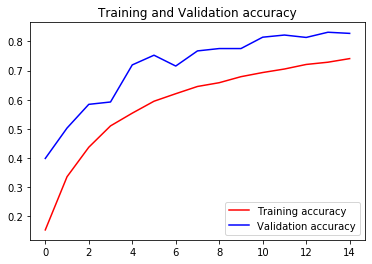

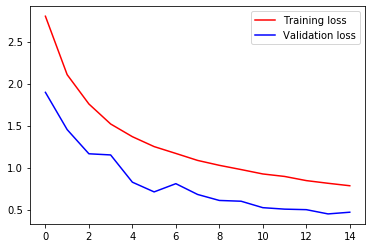

<Figure size 432x288 with 0 Axes>

In [10]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label = 'Training accuracy')
plt.plot(epochs, val_acc, 'b', label = 'Validation accuracy')
plt.title('Training and Validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.legend()
plt.figure()

plt.show()